### Predictive Model for No show-up patients

**by Fareeda Saleh**

#### Introduction:

This kernall is tried to focus on (No Show up patient)  problem in Vitoria the capital city of Espirito Santo State-Brazil, which the patient set his appointment then he/she don't show up!!
so I conducted a quick analysis to identfy what cause this problem and built a predictive model to predict the patient who doesn't show up.


first I will load the necessary packages for this analysis.

In [755]:
 # load necessary packages 
import pandas as  pd 
import numpy  as  np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns


In [756]:
 Patient = pd.read_csv("C:\Users\Fralh\Downloads\KaggleV2-May-2016.csv") 

let's take a general overview about these data:

In [757]:
 ##Dimensions of the Dataset
print  (Patient.shape) 

(110527, 14)


So, we have 14 variables and 110527 records.

In [758]:
 ## take a sample of dataset.
display(Patient.head(5)) 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [759]:
 ## take a sample of dataset. 
display(Patient.tail(5)) 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


### Data Wringling


Now in this step, I will prepare the data for the analysis by checking if there is missing values or invalid values.

In [760]:
Patient.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


good, there are no missing values!! now I will classify the variables into four groups patient information, appointment information, health situation and the general information, I think this will help me in data preparation process.


** 1- Patient Information**

- PatientId 
- Gender
- Age



I will ignore Patient Id as I think it has no importance in our analysis. Now let check the values of Gender and Age:


In [761]:
 # delete the patient Id 
del Patient["PatientId"]
# check the values of the rest of patient information group.
print "Gender:{}".format(list(set (Patient["Gender"]))) 
 print "Age : {}".format(list(set(Patient["Age"]))) 

Gender:['M', 'F']
Age : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115, -1]


There are tow values for gender M = male and F= Female so no need to perform any cleaning or auditing process, but in the Age variable We can see strang values for some patients like 100 and above and negative values, I wonder if the negative values mean baby before born or it may come from a typo error however as I'm not sure about this value I will delete it, also I check in the  [geoba.se](http://www.geoba.se/country.php?cc=BR&year=2017) and I found the average of life expectancy in Brazil is about 74.06 and there are just 4,388 people have age 100 and above so I will choose to delete patients who have age in this range.In addition we will classify the patient according to their age to child, adult and senior.


In [762]:
 Patient = Patient[(Patient["Age"] < 100) & (Patient["Age"]>0)] 

In [763]:
def FormatAge (age):
    if age['Age']>0 and age['Age']<=17 :
        return 'Child'
    elif age['Age']>=18 and age['Age'] <50:
        return 'Adult'
    else:
        return 'Senior'

In [764]:
Patient['AgeClass'] = Patient.apply(FormatAge,axis=1)

 **2- Appointment Information**
 
- AppointmentID 
- ScheduledDay
- AppointmentDay



for the group of Appointment Information, I will remove the AppointmentID from our dataset and reformate the ScheduledDay, in addition, i will create a new variable WaitingDay which mean the duration between the scheduled date and the appointment date.


In [765]:
 # AppointmentID 
del Patient["AppointmentID"]  
 # Reformatting the Scheduled Date and Appointment Day 
def AppointmentFormat(Patient):  
    Patient["ScheduledDay"] = pd.to_datetime(Patient["ScheduledDay"], format="%Y/%m/%d %H:%M:%S")
    Patient["AppointmentDay"] = pd.to_datetime(Patient["AppointmentDay"], format="%Y/%m/%d %H:%M:%S") 
    Patient["Scheduledyear"]= Patient["ScheduledDay"].dt.year 
    Patient["Scheduledmonth"]= Patient["ScheduledDay"].dt.month   
    Patient["Scheduledweek"]= Patient["ScheduledDay"].dt.weekday   
    Patient["Scheduledhour"]= Patient["ScheduledDay"].dt.hour 
# Appointment Day Reformatting and create additional col 
    Patient["Appointmentyear"]= Patient["AppointmentDay"].dt.year  
    Patient["Appointmentmonth"]= Patient["AppointmentDay"].dt.month   
    Patient["Appointmentweek"]= Patient["AppointmentDay"].dt.weekday 
    Patient['WaitingDay']=np.where(Patient.ScheduledDay.dt.date==Patient.AppointmentDay.dt.date, 0, Patient.AppointmentDay.sub(Patient.ScheduledDay))

    
AppointmentFormat(Patient) 


** 3.Health Situation**
- Hypertension 
- Diabetes
- Alcoholism
- Handcap


In [766]:
 # correcte the misspiling for Hipertension clumane
Patient = Patient.rename(columns = {'Hipertension':'Hypertension'}) 

In [767]:
#chek the valus of varibles. 
print "Hypertension:{}".format(list(set (Patient["Hypertension"]))) 
print "Diabetes : {}".format(list(set(Patient["Diabetes"]))) 
print "Alcoholism:{}".format(list(set(Patient["Alcoholism"]))) 
print "Handcap : {}".format(list(set(Patient["Handcap"])))

Hypertension:[0, 1]
Diabetes : [0, 1]
Alcoholism:[0, 1]
Handcap : [0, 1, 2, 3, 4]


**4- Genral Infomation**
- SMS_received
- No-show
- Neighbourhood
- Scholarship



In [768]:
print "SMS:{}".format(list(set (Patient["SMS_received"]))) 
print "No-show : {}".format(list(set(Patient["No-show"]))) 
print "Scholarship:{}".format(list(set(Patient["Scholarship"])))  
print "Neighbourhood : {}".format(list(set(Patient["Neighbourhood"]))) 

SMS:[0, 1]
No-show : ['Yes', 'No']
Scholarship:[0, 1]
Neighbourhood : ['BOA VISTA', 'BARRO VERMELHO', 'CRUZAMENTO', 'SANTA HELENA', 'SOLON BORGES', 'SANTA MARTHA', 'BELA VISTA', 'PARQUE MOSCOSO', 'ILHA DO BOI', 'HORTO', 'DO QUADRO', 'S\xc3\x83O PEDRO', 'SANTA L\xc3\x9aCIA', 'ARIOVALDO FAVALESSA', 'DE LOURDES', 'SEGURAN\xc3\x87A DO LAR', 'CONQUISTA', 'S\xc3\x83O BENEDITO', 'MARU\xc3\x8dPE', 'COMDUSA', 'DA PENHA', 'FORTE S\xc3\x83O JO\xc3\x83O', 'JESUS DE NAZARETH', 'JOANA D\xc2\xb4ARC', 'FRADINHOS', 'SANTA TEREZA', 'INHANGUET\xc3\x81', 'GURIGICA', 'BONFIM', 'FONTE GRANDE', 'ESTRELINHA', 'S\xc3\x83O JOS\xc3\x89', 'REP\xc3\x9aBLICA', 'SANTOS DUMONT', 'SANTA CEC\xc3\x8dLIA', 'JUCUTUQUARA', 'RESIST\xc3\x8aNCIA', 'JARDIM DA PENHA', 'JABOUR', 'M\xc3\x81RIO CYPRESTE', 'S\xc3\x83O CRIST\xc3\x93V\xc3\x83O', 'NOVA PALESTINA', 'ENSEADA DO SU\xc3\x81', 'MONTE BELO', 'SANTA CLARA', 'ILHAS OCE\xc3\x82NICAS DE TRINDADE', 'JARDIM CAMBURI', 'ILHA DE SANTA MARIA', 'DO MOSCOSO', 'GRANDE VIT\xc3\x93RIA', '

In [769]:
print  (Patient.shape) 

(106976, 21)


ok, we start with 14 varibles and now we end up with 21 varibles,I think the data seems to be clean enughe and valied to start the analysis.


### Data Analysis:


**first let see How many patient attende thier appointment :**


In [770]:
 print (Patient.groupby("No-show").size()) 

No-show
No     85299
Yes    21677
dtype: int64


 (20.27%) of the Patients not attend the appointment and approximately (79.73%) of them came to their appointment, so we will try to go deeper in the data and identify how each features play roles in this problem.


** How the  Patient gender play role in this analysis?? **

In [771]:

print('Distribution of Gender')
print(Patient.groupby(['Gender']).Gender.count())



Distribution of Gender
Gender
F    70109
M    36867
Name: Gender, dtype: int64


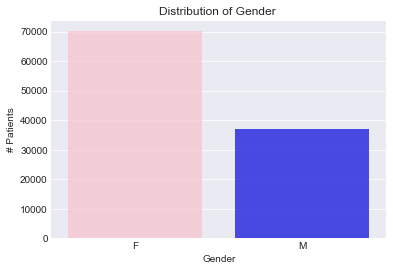

In [772]:
sns.set_style('darkgrid')
sns.countplot(Patient['Gender'], alpha =.80, palette= ['pink','blue'])
plt.title('Distribution of Gender ')
plt.ylabel('# Patients')
plt.show()

In [773]:

print(Patient.groupby('Gender')['No-show'].value_counts(normalize = True))


Gender  No-show
F       No         0.796431
        Yes        0.203569
M       No         0.799143
        Yes        0.200857
Name: No-show, dtype: float64


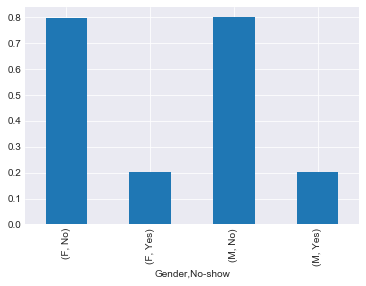

In [774]:
Patient.groupby('Gender')['No-show'].value_counts(normalize = True).plot(kind='bar')
plt.show()




We can see the women are most likely visit the hospitals than men this may due to several reasons : women take care about her health than men and also the pregnant woman usually visit the hospital several time during her pregnancy, and we may consider that the population mean for women is greater than mean in Brazil, but when we foucse on the (Show up) statuse we can see   79.6% of wamen attened to their appointment compared to 79.9% of men, so women and men are most likly to have the same rate of attendance.

** Does the Age affected the patient attendance to their appointment? Dose the elderly woman take care about her health more than elderly man?**

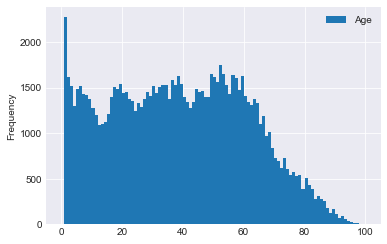

In [775]:
##Age Distrabuation
Patient.plot(kind = "hist",y = "Age",bins =100,range= (0,100)) 
plt.show() 

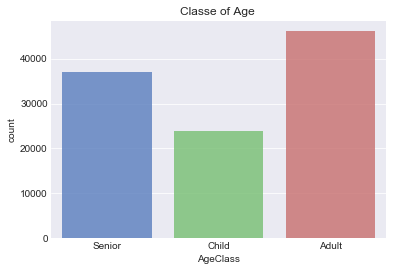

AgeClass  No-show
Adult     No         0.776539
          Yes        0.223461
Child     No         0.775252
          Yes        0.224748
Senior    No         0.837542
          Yes        0.162458
Name: No-show, dtype: float64


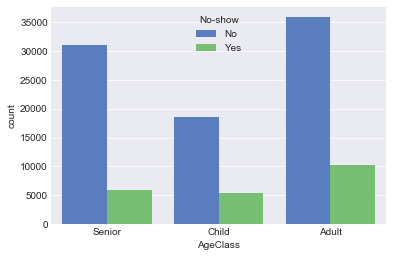

In [776]:
# number of patient according to thier aGE CLAss
sns.set_style('darkgrid')

sns.countplot(Patient['AgeClass'], alpha =.80,palette="muted")
plt.title('Classe of Age ')
plt.show()

print (Patient.groupby('AgeClass')['No-show'].value_counts(normalize = True))

sns.set_style('darkgrid')
fig = sns.countplot(x='AgeClass', data=Patient,hue='No-show', palette="muted");
plt.show()


In [777]:

pd.pivot_table(Patient,index=['AgeClass','No-show','Gender'],values=["Age"])


Age
AgeClass No-show Gender           
Adult    No      F       33.572489
                 M       34.514534
         Yes     F       32.584786
                 M       33.333793
Child    No      F        8.753021
                 M        7.659483
         Yes     F        9.609187
                 M        8.618356
Senior   No      F       63.419264
                 M       63.633761
         Yes     F       62.957364
                 M       62.999470

Most patients were between the age of 18 and 49 and the patients below 18 years has the minimum rate of visiting the hospital. However, when we see the show-up status we found patients above 50 years are most likely did not attend their appointment and also the gender did not play any role in this analysis.

** Scheduled day , Appointmeint Day and Waiting Day **

Text(0.5,1,u'Scheduledmonth')

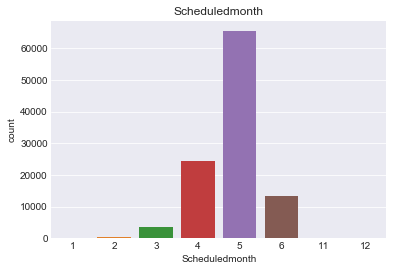

In [778]:
sns.countplot(Patient['Scheduledmonth'])
plt.title('Scheduledmonth')


Text(0.5,1,u'Appointmentmonth')

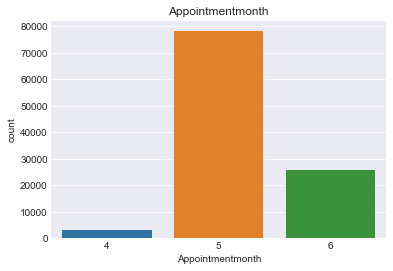

In [779]:
sns.countplot(Patient['Appointmentmonth'])
plt.title('Appointmentmonth')

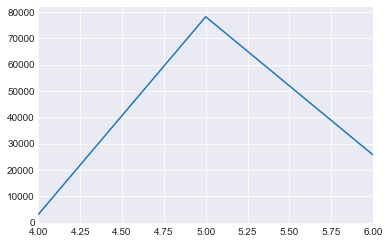

In [780]:
Patient.Appointmentmonth.value_counts().sort_index().plot()

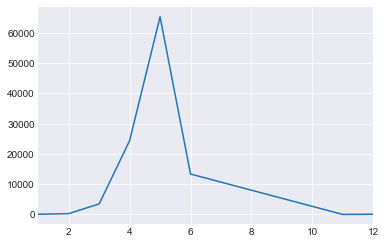

In [781]:
Patient.Scheduledmonth.value_counts().sort_index().plot()

ok, in the appointment month it just includes 3 months!! on another hand the Scheduled month missed the months (7 to 10). However, in both diagrams, the most rate appointment was in may which is the end of Autumn in Brazile.

In [782]:

print "Appointment month : {}".format(list(set(Patient["Appointmentmonth"]))) 
print "Scheduled month : {}".format(list(set(Patient["Scheduledmonth"])))

Appointment month : [4, 5, 6]
Scheduled month : [1, 2, 3, 4, 5, 6, 11, 12]


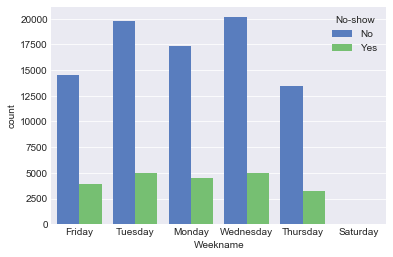

In [783]:
Patient["Weekname"] = Patient.AppointmentDay.dt.weekday_name
fig = sns.countplot(x='Weekname', data=Patient,hue='No-show', palette="muted");
plt.show()


In [784]:

Patient['WaitingDay'] = Patient['WaitingDay'].astype('timedelta64[D]')
print(Patient.WaitingDay.max())
print (Patient.WaitingDay.min())
## delete the nagative values
##check the nigative valuues 
#Patient.loc[Patient['WaitingDay']<0]
Patient=Patient[Patient.WaitingDay>=0]

178.0
-7.0


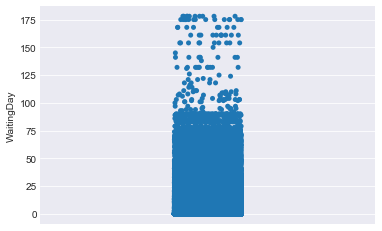

In [785]:
## waiting day distrbuation
sns.stripplot(y="WaitingDay",data=Patient, jitter=True)


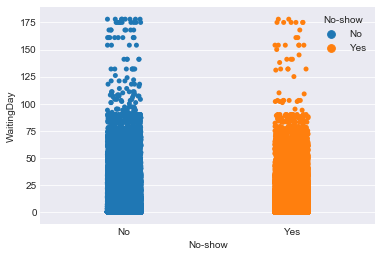

In [786]:
sns.stripplot(x="No-show" ,y="WaitingDay",hue="No-show",data=Patient, jitter=True)


The patient tends to attend his appointment in the middle of the week, and no show up at the end of the week, especially in Thursday. If we focus on the waiting day and how the data is distribution we can see there is 
a drop in the appointment number after the three months of waiting especially for the group who not came to there appointments.

**How the Sms reminder and handicap variables affect the patient attendance ??**

In [787]:
print(Patient["Handcap"].value_counts())
print(Patient.groupby('Handcap')['No-show'].value_counts(normalize = True))



0    104739
1      2033
2       183
3        13
4         3
Name: Handcap, dtype: int64
Handcap  No-show
0        No         0.796924
         Yes        0.203076
1        No         0.822430
         Yes        0.177570
2        No         0.797814
         Yes        0.202186
3        No         0.769231
         Yes        0.230769
4        No         0.666667
         Yes        0.333333
Name: No-show, dtype: float64


In [788]:
print(Patient["SMS_received"].value_counts())

print(Patient.groupby('SMS_received')['No-show'].value_counts(normalize = True))


0    72388
1    34583
Name: SMS_received, dtype: int64
SMS_received  No-show
0             No         0.832790
              Yes        0.167210
1             No         0.723332
              Yes        0.276668
Name: No-show, dtype: float64


### Predictive Model

In [790]:
## convert to numercal
Patient = Patient.replace('Yes',1)
Patient = Patient.replace('No',0)


In [792]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Patient["Neighbourhood"])
Patient["Neighbourhood"]=le.transform(Patient["Neighbourhood"])


In [791]:
Patient = Patient.drop(['ScheduledDay','AppointmentDay','AgeClass','Weekname','Gender'],axis=1)

In [709]:
#cols = Patient.columns.tolist()
#cols = cols[-1:] + cols[:-1]
#Patient = Patient[cols] 

In [795]:
Patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106971 entries, 0 to 110526
Data columns (total 16 columns):
Age                 106971 non-null int64
Neighbourhood       106971 non-null int64
Scholarship         106971 non-null int64
Hypertension        106971 non-null int64
Diabetes            106971 non-null int64
Alcoholism          106971 non-null int64
Handcap             106971 non-null int64
SMS_received        106971 non-null int64
Scheduledyear       106971 non-null int64
Scheduledmonth      106971 non-null int64
Scheduledweek       106971 non-null int64
Scheduledhour       106971 non-null int64
Appointmentyear     106971 non-null int64
Appointmentmonth    106971 non-null int64
Appointmentweek     106971 non-null int64
WaitingDay          106971 non-null float64
dtypes: float64(1), int64(15)
memory usage: 18.9 MB


In [794]:
y = Patient['No-show'].values
del Patient['No-show']
x = Patient.values
#print (np.unique(y))

In [ ]:
'''''''''''
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 24)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) 
print "This is the validation matrix"
report = classification_report(y_test, pred )
print report
''''''''

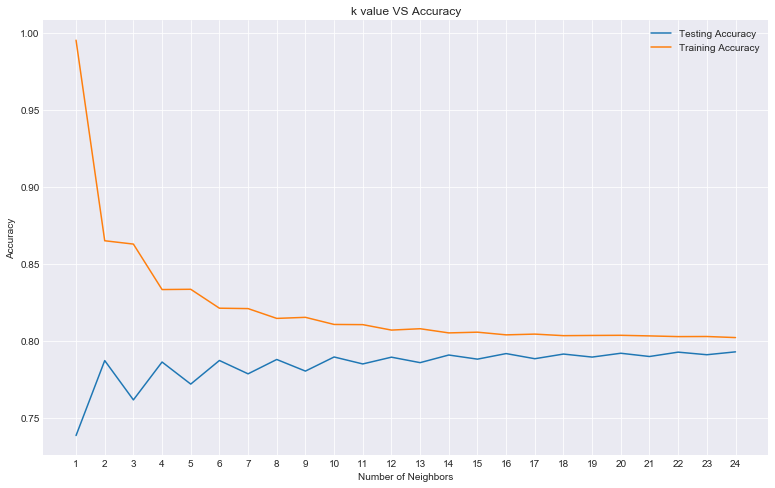

Best accuracy is 0.792939050231 with K = 24


In [828]:
##from sklearn.metrics import classification_report
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=15)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
print('With DecisionTree ',clf.score(x_test,y_test))
print "This is the validation matrix"
##report = classification_report(y_test, pred )
##print report



('With KNN (K=3) accuracy is: ', 0.7659852922846816)
This is the validation matrix
             precision    recall  f1-score   support

          0       0.81      0.92      0.86     25560
          1       0.35      0.17      0.23      6532

avg / total       0.72      0.77      0.73     32092



### Conclusion and future work:

I try to identify how each variable in the dataset could affect the patient show up status and I found the adult patient tend to came to their appointment more than other ages also the patient are more likely to show up in middle of week more than the start of week and finally I built a predictive model to predict the patient who no show up, However there a lot to do to explore more variables in this data set and also the predictive model need to optimize.

('With KNN (K=3) accuracy is: ', 0.79652249781877105)
This is the validation matrix
             precision    recall  f1-score   support

          0       0.80      1.00      0.89     25560
          1       1.00      0.00      0.00      6532

avg / total       0.84      0.80      0.71     32092



ImportError: No module named feature_format